In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
# YOUR CODE HERE!
file_path = Path("./Resources/lending_data.csv")
df_lending = pd.read_csv(file_path)
# Review the DataFrame
# YOUR CODE HERE!
display(df_lending.head())
display(df_lending.tail())

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1
77535,15600.0,9.742,72300,0.585062,9,2,42300,1


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features
# Separate the y variable, the labels
# YOUR CODE HERE!]
y = df_lending['loan_status']

# Separate the X variable, the features
# YOUR CODE HERE!
X = df_lending.drop(columns=['loan_status'])

In [4]:
# Review the y variable Series
# YOUR CODE HERE!

display(y.head())
display(y.tail())

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, dtype: int64

In [5]:
# Review the X variable DataFrame
# YOUR CODE HERE!

display(X.head())
display(X.tail())

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
77531,19100.0,11.261,86600,0.653580,12,2,56600
77532,17700.0,10.662,80900,0.629172,11,2,50900
77533,17600.0,10.595,80300,0.626401,11,2,50300
77534,16300.0,10.068,75300,0.601594,10,2,45300
77535,15600.0,9.742,72300,0.585062,9,2,42300


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [6]:
# Check the balance of our target values
# YOUR CODE HERE!

y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [7]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
# YOUR CODE HERE!

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,stratify=y)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [8]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!
logistic_regression_model = LogisticRegression(random_state=1)



# Fit the model using training data
# YOUR CODE HERE!

lr_model = logistic_regression_model.fit(X_train, y_train)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [9]:
# Make a prediction using the testing data
# YOUR CODE HERE!

testing_predictions = lr_model.predict(X_test)
pd.DataFrame({"Prediction": testing_predictions, "Actual": y_test})

,Prediction,Actual
36831,0,0
75818,0,1
36563,0,0
13237,0,0
43292,0,0
...,...,...
38069,0,0
36892,0,0
5035,0,0
40821,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [10]:
# Print the balanced_accuracy score of the model
# YOUR CODE HERE!

print(f"Training Data Score: {lr_model.score(X_train, y_train)}")
print(f"Testing Data Score: {lr_model.score(X_test, y_test)}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(y_test, testing_predictions)}")



Training Data Score: 0.9914878250103177
Testing Data Score: 0.9924164259182832
Balanced Accuracy Score: 0.9442676901753825


In [11]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!

cm_imbalanced = confusion_matrix(y_test, testing_predictions)
cm_imbalanced_df = pd.DataFrame(cm_imbalanced, 
                                index = ['Actual Healthy Loans (low-risk)', 
                                'Actual Non-Healthy Loans (high-risk)'], 
                                columns = ['Predicted Healthy Loans (low-risk)', 'Predicted Non-Healthy Loans (high-risk)']
                              )
cm_imbalanced_df

,Predicted Healthy Loans (low-risk),Predicted Non-Healthy Loans (high-risk)
Actual Healthy Loans (low-risk),18679,80
Actual Non-Healthy Loans (high-risk),67,558


[Text(0, 0.5, 'healthy loan'), Text(0, 1.5, 'high-risk loan')]

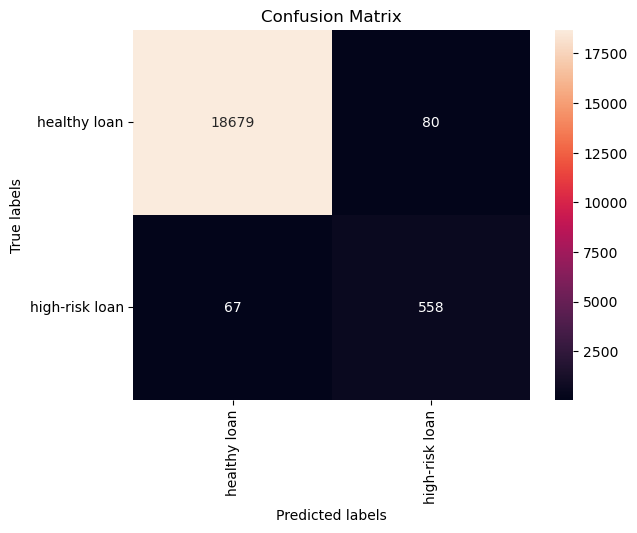

In [12]:
import matplotlib.pyplot as plt
import seaborn as sn    

ax= plt.subplot()
sn.heatmap(cm_imbalanced_df, annot=True, fmt='g', ax=ax);  
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['healthy loan', 'high-risk loan']); ax.yaxis.set_ticklabels(['healthy loan', 'high-risk loan'])

In [13]:
# Print the classification report for the model
# YOUR CODE HERE!


testing_report = classification_report(y_test, testing_predictions)

print(testing_report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.89      0.88       625

    accuracy                           0.99     19384
   macro avg       0.94      0.94      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** Precision and recall values are crucial in minimizing the cost of misclassification. High precision is necessary to reduce false positives and prevent a loss of potential customers, while high recall is needed to minimize false negatives and prevent financial losses. A logistic regression model with 0.99 accuracy shows that recall is the best metric for predicting healthy loans, but this result is misleading due to dataset imbalance. Sampling the data to create a more balanced dataset could result in a higher degree of precision.

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [14]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!
ROS = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
# YOUR CODE HERE!
X_resampled, y_resampled= ROS.fit_resample(X_train, y_train)

In [15]:
# Count the distinct values of the resampled labels data
# YOUR CODE HERE!

y_resampled.value_counts()

0    56277
1    56277
Name: loan_status, dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [16]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!

model_ROS = LogisticRegression(solver='lbfgs', random_state=1)

# Fit the model using the resampled training data
# YOUR CODE HERE!
model_ROS.fit(X_resampled, y_resampled)

# Make a prediction using the testing data
# YOUR CODE HERE!
predictions_ROS = model_ROS.predict(X_test)
pd.DataFrame({"Prediction": predictions_ROS, "Actual": y_test})


,Prediction,Actual
36831,0,0
75818,1,1
36563,0,0
13237,0,0
43292,0,0
...,...,...
38069,0,0
36892,0,0
5035,0,0
40821,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [17]:
# Print the balanced_accuracy score of the model 
# YOUR CODE HERE!

print(f"Training Data Score: {model_ROS.score(X_train, y_train)}")
print(f"Testing Data Score: {model_ROS.score(X_test, y_test)}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(y_test, predictions_ROS)}")

Training Data Score: 0.9941016646031091
Testing Data Score: 0.9952022286421791
Balanced Accuracy Score: 0.9959744975744975


In [18]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!

cm_oversampled = confusion_matrix(y_test, predictions_ROS)
cm_oversampled_df = pd.DataFrame(cm_oversampled, 
                                index = ['Actual Healthy Loans (low-risk)', 
                                'Actual Non-Healthy Loans (high-risk)'], 
                                columns = ['Predicted Healthy Loans (low-risk)', 'Predicted Non-Healthy Loans (high-risk)']
                              )
cm_oversampled_df

,Predicted Healthy Loans (low-risk),Predicted Non-Healthy Loans (high-risk)
Actual Healthy Loans (low-risk),18668,91
Actual Non-Healthy Loans (high-risk),2,623


[Text(0, 0.5, 'healthy loan'), Text(0, 1.5, 'high-risk loan')]

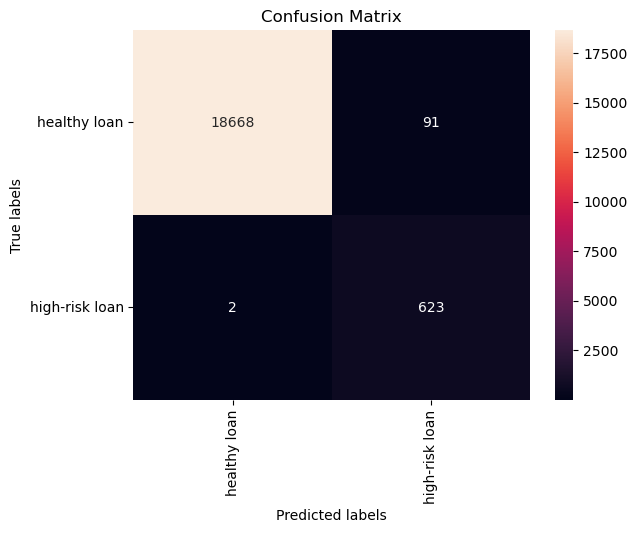

In [19]:
ax= plt.subplot()
sn.heatmap(cm_oversampled_df, annot=True, fmt='g', ax=ax); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['healthy loan', 'high-risk loan']); ax.yaxis.set_ticklabels(['healthy loan', 'high-risk loan'])

In [20]:
# Print the classification report for the model
# YOUR CODE HERE!

print(classification_report(y_test, predictions_ROS))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      1.00      0.93       625

    accuracy                           1.00     19384
   macro avg       0.94      1.00      0.96     19384
weighted avg       1.00      1.00      1.00     19384



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The resampled dataset improved the model's performance on test data with high precision and perfect recall, indicating good real-life performance. Resampling improved the initial Logistic Regression model with a balanced accuracy score increased from 0.942 to 0.995, effectively distinguishing high-risk loans with high recall and accuracy. The oversampled model achieved perfect accuracy due to its ability to catch mistakes, minimizing financial losses. A lending company may prioritize a model with high precision for high-risk loans to avoid false positives, even if it means sacrificing some healthy loans as false negatives.